In [36]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import os
import numpy as np
import matplotlib.colors as mcolors
%matplotlib inline

In [37]:
def zfill(s, width):
    return s.zfill(width)

def fill_fips(df):
    indexes = df.index
    idx_list = []
    for i in indexes:
        if len(str(i)) == 4:
            i = zfill(str(i), 5)
        idx_list.append(i)

    # convert all elements to str
    idx_list = [str(i) for i in idx_list]
    df.index = idx_list

    return df
    

### DT Owner Count

In [38]:
oc = pd.read_csv('/mnt/gis-nfs/users/abreunig/superparcels/analysis/owner_count_analysis.csv', index_col=0)
oc = fill_fips(oc)
oc

,30,50,75,100,150,200
06091,106,111,111,113,115,118
55107,2367,2391,2403,2414,2425,2437
08031,1194,1240,1289,1308,1359,1399
06075,655,693,723,755,805,845
16001,2758,2855,2951,3003,3092,3133
35051,233,252,263,269,281,293
20097,224,232,239,244,251,254
41013,404,410,418,423,431,433
48113,5933,6204,6418,6554,6811,6977
06037,18313,18870,19321,19658,20194,20610


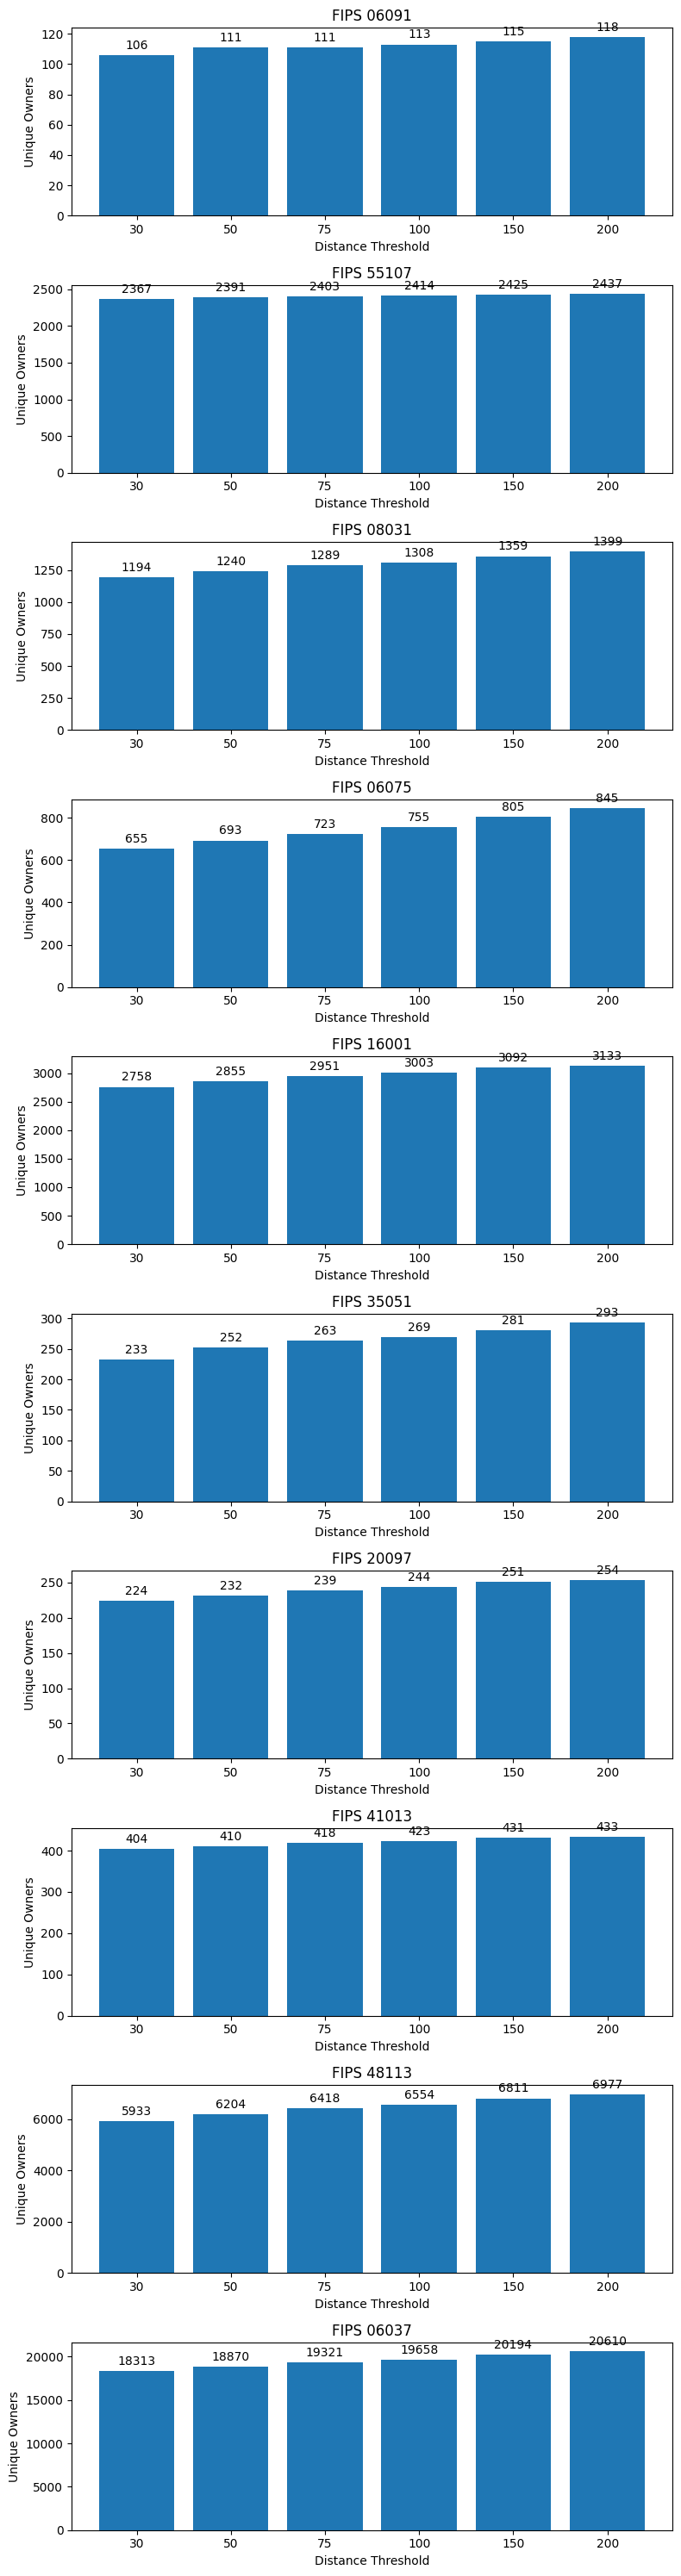

In [39]:
# Separate the index values and bar values
indexes = oc.index.to_list()
bar_values = oc.values

# Create one subplot for each row in the oc
nrows = oc.shape[0]
fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(8, 3*nrows))

# In case there is only one row, ensure axes is iterable.
if nrows == 1:
    axes = [axes]

for i, ax in enumerate(axes):
    # Create the bar plot for the current row
    bars = ax.bar(oc.columns.to_list(), bar_values[i])
   
    ax.bar_label(bars, padding=3)
    
    # Set the title of the subplot to show the index value
    ax.set_title(f"FIPS {indexes[i]}")
    
    # Optionally, label axes
    ax.set_xlabel("Distance Threshold")
    ax.set_ylabel("Unique Owners")

plt.tight_layout()
plt.show()


### DT Overlap

In [40]:
dt_overlap = pd.read_csv('/mnt/gis-nfs/users/abreunig/superparcels/analysis/dt_overlap_analysis.csv', index_col=0)
dt_overlap = fill_fips(dt_overlap)
dt_overlap

,30_overlaps,30_sp_count,30_pct_overlap,30_avg_overlap,50_overlaps,50_sp_count,50_pct_overlap,50_avg_overlap,75_overlaps,75_sp_count,...,100_pct_overlap,100_avg_overlap,150_overlaps,150_sp_count,150_pct_overlap,150_avg_overlap,200_overlaps,200_sp_count,200_pct_overlap,200_avg_overlap
06091,0,294,0.0,NaN,0.0,302.0,0.0,NaN,0,299,...,0.0,NaN,0,307,0.0,NaN,0.0,312.0,0.0,NaN
55107,0,10938,0.0,NaN,0.0,11012.0,0.0,NaN,0,8245,...,0.0,NaN,0,8237,0.0,NaN,NaN,NaN,NaN,NaN
08031,0,3427,0.0,NaN,0.0,3435.0,0.0,NaN,0,3491,...,0.0,NaN,0,3574,0.0,NaN,0.0,3574.0,0.0,NaN
06075,0,2780,0.0,NaN,0.0,2808.0,0.0,NaN,0,1945,...,0.0,NaN,0,2160,0.0,NaN,0.0,2290.0,0.0,NaN
16001,0,7272,0.0,NaN,0.0,7291.0,0.0,NaN,0,7342,...,0.0,NaN,0,7336,0.0,NaN,0.0,7367.0,0.0,NaN
35051,0,572,0.0,NaN,0.0,614.0,0.0,NaN,0,636,...,0.0,NaN,0,644,0.0,NaN,0.0,664.0,0.0,NaN
20097,0,543,0.0,NaN,0.0,562.0,0.0,NaN,0,578,...,0.0,NaN,0,598,0.0,NaN,0.0,607.0,0.0,NaN
41013,0,1001,0.0,NaN,0.0,1001.0,0.0,NaN,0,1010,...,0.0,NaN,0,1035,0.0,NaN,0.0,1037.0,0.0,NaN
48113,0,15077,0.0,NaN,0.0,15389.0,0.0,NaN,0,15756,...,0.0,NaN,0,16405,0.0,NaN,0.0,16832.0,0.0,NaN
06037,0,47645,0.0,NaN,NaN,NaN,NaN,NaN,0,48263,...,0.0,NaN,0,49750,0.0,NaN,0.0,50492.0,0.0,NaN


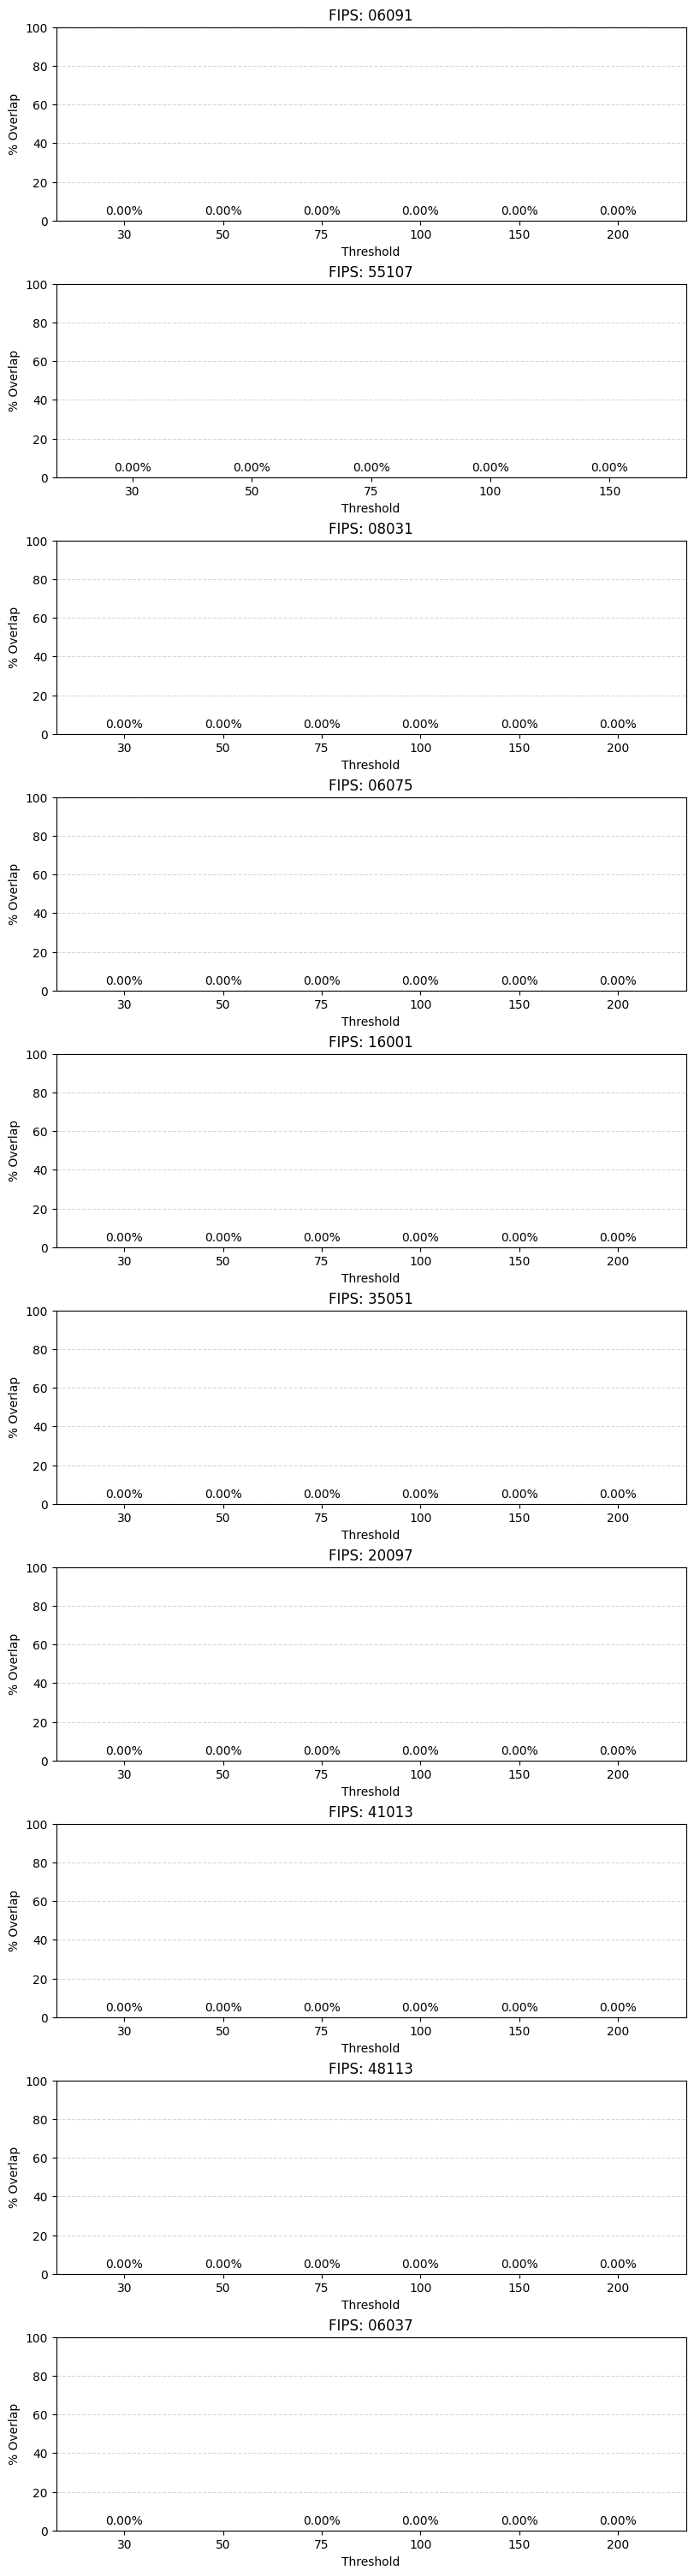

In [41]:
# Extract all thresholds based on column names that include 'pct_overlap'
thresholds = sorted([
    int(col.split('_')[0]) for col in dt_overlap.columns if 'pct_overlap' in col
])

# Plotting
num_fips = len(dt_overlap)
fig, axes = plt.subplots(num_fips, 1, figsize=(8, 3 * num_fips), constrained_layout=True)

if num_fips == 1:
    axes = [axes]  # Make iterable if only one

for ax, (fips, row) in zip(axes, dt_overlap.iterrows()):
    pct_overlaps = [row[f"{t}_pct_overlap"] for t in thresholds]
    threshold_labels = [str(t) for t in thresholds]

    bars = ax.bar(threshold_labels, pct_overlaps, color='skyblue')
    ax.set_title(f"FIPS: {fips}")
    ax.set_xlabel("Threshold")
    ax.set_ylabel("% Overlap")
    ax.set_ylim(0, 100)  # Adjust if your values exceed 100
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    # Add bar labels
    ax.bar_label(bars, labels=[f"{val:.2f}%" for val in pct_overlaps], padding=3)

plt.show()


### DT Area Ratio

In [ ]:
# read in the csv
area_ratio_df = pd.read_csv('/mnt/gis-nfs/users/abreunig/superparcels/analysis/dt_area_ratio_analysis.csv', index_col=0)
area_ratio_df = area_ratio_df[['fips', 'dt', 'area_ratio']].set_index('fips')
area_ratio_df = fill_fips(area_ratio_df)
area_ratio_df = area_ratio_df.reset_index().rename(columns={'index': 'fips'})

,fips,dt,area_ratio
0,06091,30,0.998981
1,06091,30,0.999985
2,06091,30,0.999826
3,06091,30,0.995627
4,06091,30,0.999888
...,...,...,...
461232,06037,200,0.394559
461233,06037,200,0.895240
461234,06037,200,0.904164
461235,06037,200,0.880144


In [43]:
area_ratio_df['dt'].unique()

array([ 30,  50,  75, 100, 150, 200])

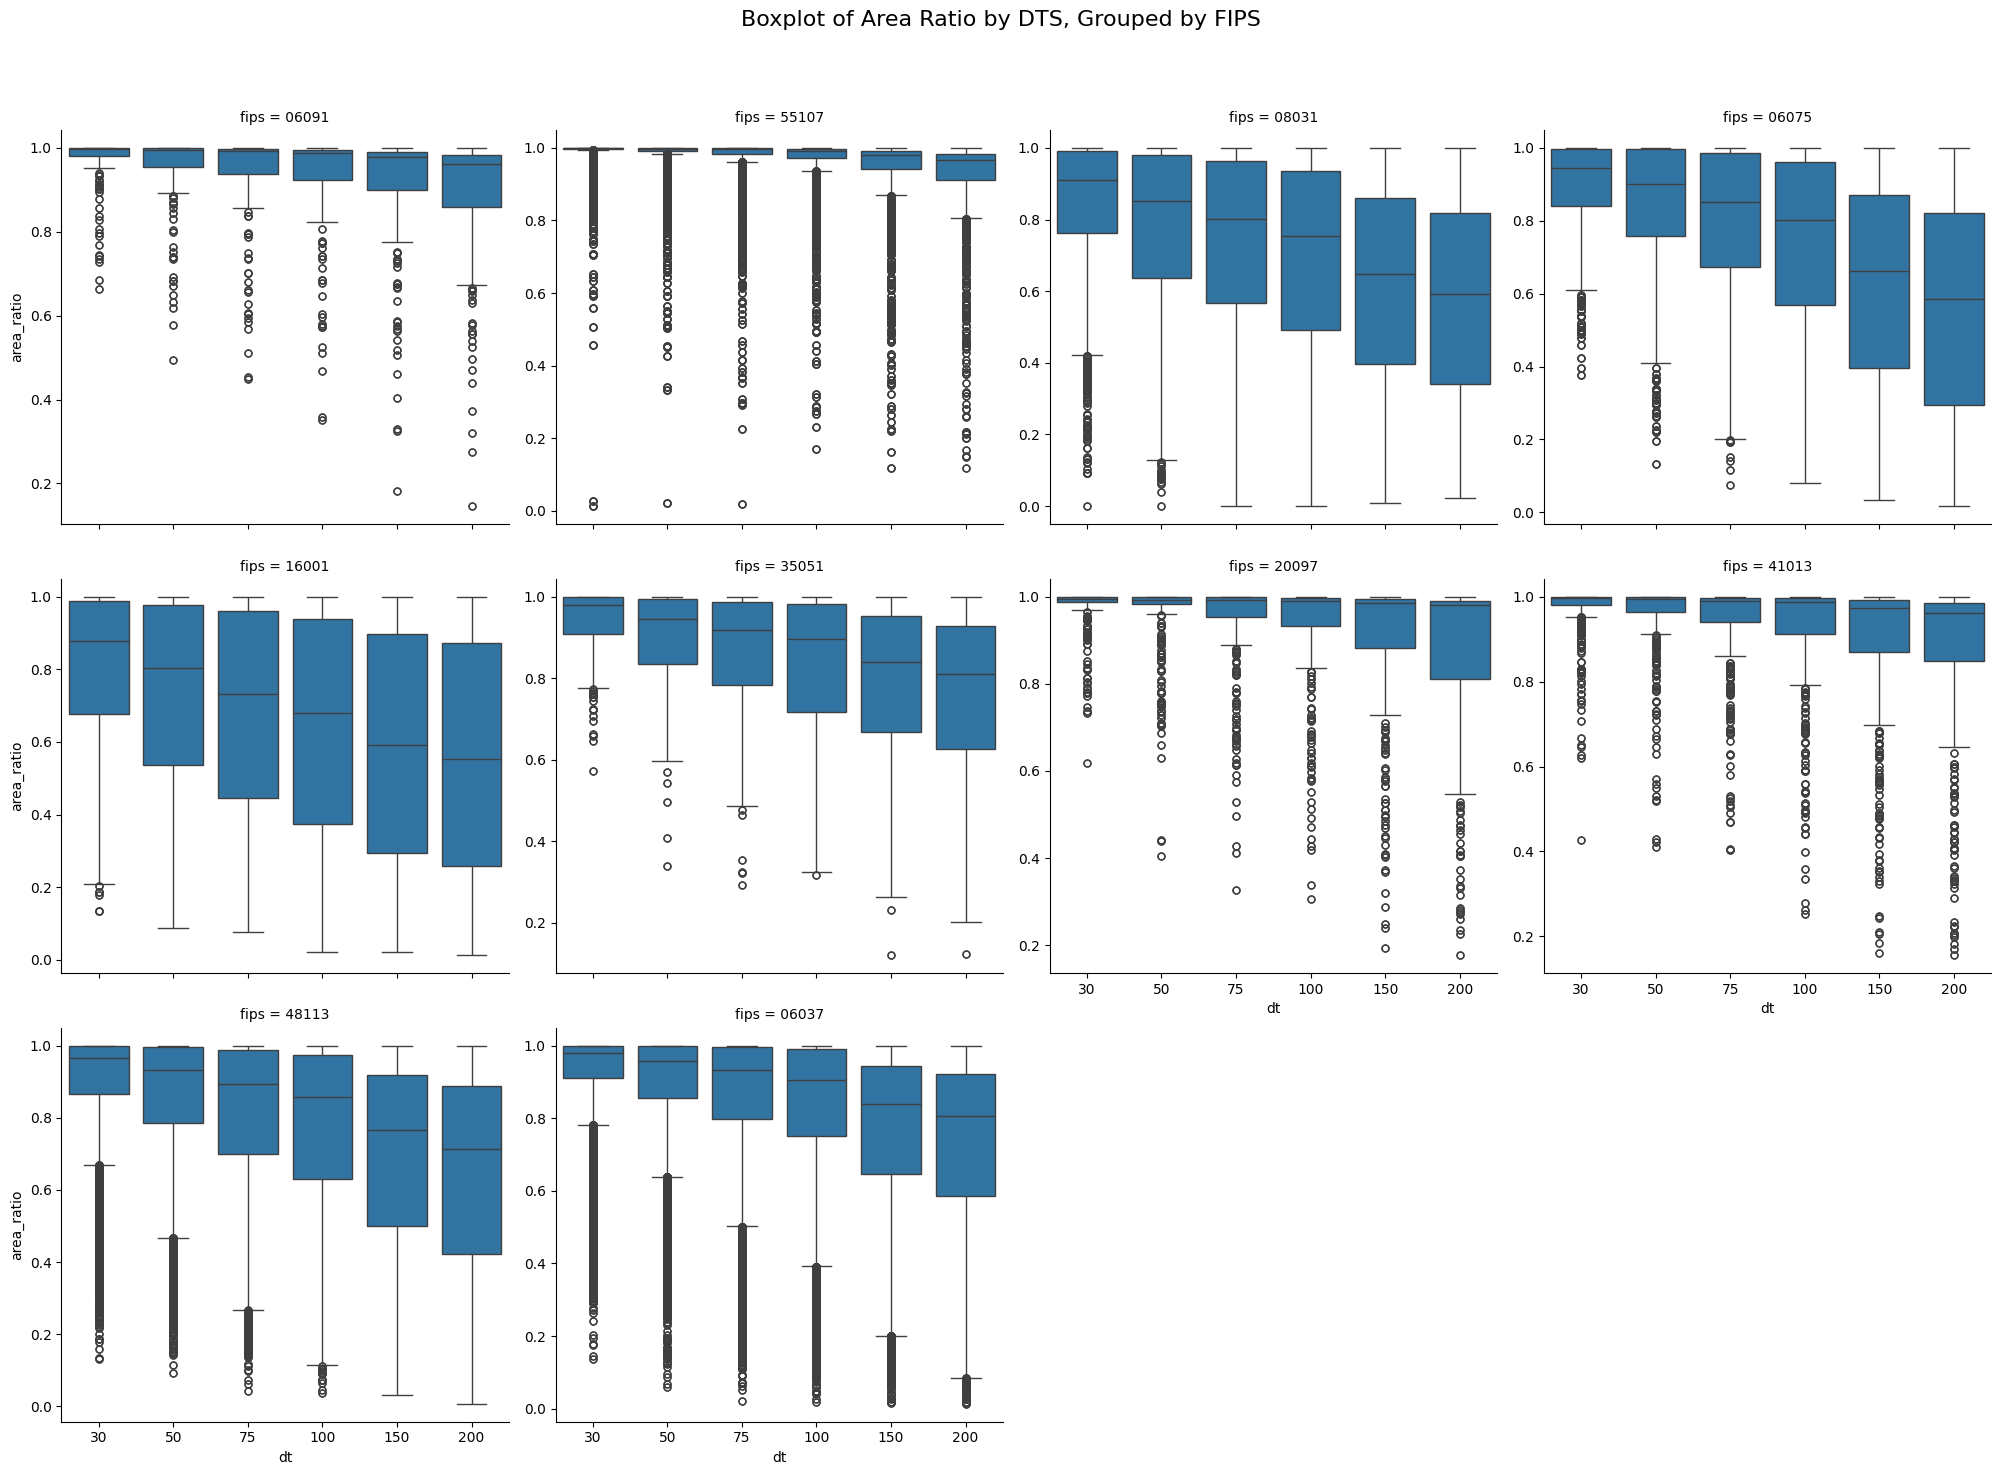

In [44]:

# Create one boxplot per FIPS
g = sns.catplot(
    data=area_ratio_df,  # Assuming this is your DataFrame
    x='dt',
    y='area_ratio',
    col='fips',             # One subplot per FIPS
    kind='box',
    col_wrap=4,             # Adjust this based on number of unique FIPS
    sharey=False            # Optional: make each FIPS plot scale independently
)

# Add a super title
g.figure.suptitle("Boxplot of Area Ratio by DTS, Grouped by FIPS", fontsize=16)

# Tweak spacing so title doesn't overlap
g.figure.tight_layout()
g.figure.subplots_adjust(top=0.9)


In [45]:
# Define bins and labels
bins = np.arange(0, 1.1, 0.1)  # 0.0 to 2.0 in steps of 0.1
labels = [f"{b:.1f}-{b+0.1:.1f}" for b in bins[:-1]]

# Bin the values
area_ratio_df['area_bin'] = pd.cut(area_ratio_df['area_ratio'], bins=bins, labels=labels, include_lowest=True)

bin_counts = (
    area_ratio_df.groupby(['dt', 'area_bin'])
    .size()
    .reset_index(name='count')
)

# Pivot to wide format
bin_pivot = bin_counts.pivot_table(
    index=['dt'],
    columns='area_bin',
    values='count',
    fill_value=0
).reset_index()

bin_percent = bin_pivot.copy()
area_cols = bin_pivot.columns.difference(['dt'])
bin_percent[area_cols] = np.round(bin_percent[area_cols].div(bin_percent[area_cols].sum(axis=1), axis=0) * 100,2)
bin_percent.sort_values(by='dt', inplace=True)
display(bin_percent)



/tmp/ipykernel_1754098/199001614.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  area_ratio_df.groupby(['dt', 'area_bin'])
/tmp/ipykernel_1754098/199001614.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  bin_pivot = bin_counts.pivot_table(


area_bin,dt,0.0-0.1,0.1-0.2,0.2-0.3,0.3-0.4,0.4-0.5,0.5-0.6,0.6-0.7,0.7-0.8,0.8-0.9,0.9-1.0
0,30,0.02,0.07,0.22,0.56,1.11,2.02,3.23,5.60,12.70,74.47
1,50,0.05,0.23,0.76,1.61,2.38,3.34,4.83,8.07,14.10,64.63
2,75,0.10,0.60,1.63,2.60,3.55,4.59,6.30,9.27,14.83,56.53
3,100,0.21,1.18,2.52,3.43,4.45,5.59,6.98,9.73,15.55,50.37
4,150,0.61,2.81,4.24,4.88,6.04,7.12,8.11,11.63,17.31,37.22
5,200,1.32,4.27,5.19,5.98,6.85,7.47,8.51,12.35,17.64,30.41
